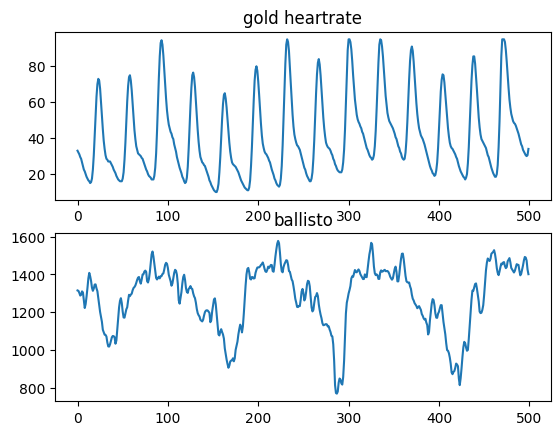

In [10]:
#%
import numpy as np
from matplotlib import pyplot as plt

n_samp = 500
gold_ts = np.genfromtxt("../data/experiments/gold.csv")
ballst = np.genfromtxt("../data/experiments/sleeprawlive.csv")

# downsample replacing R samples with their mean
R = 2
gold_ts = gold_ts.reshape(-1, R).mean(axis=1)

plt.figure(1)
plt.subplot(211)
plt.plot(gold_ts[:n_samp])
plt.title("gold heartrate downsample rate= "+str(R))
plt.subplot(212)
plt.plot(ballst[:n_samp])
plt.title("ballisto")
plt.show()

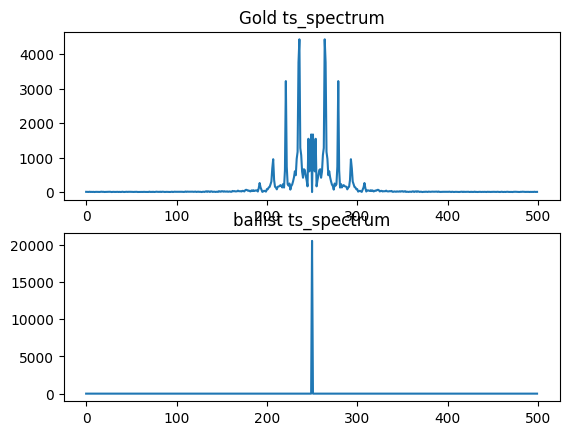

In [33]:
series1 = (gold_ts[:n_samp])
f = np.fft.fft(series1-np.mean(series1))
fshift = np.fft.fftshift(f)
magnitude_spectrum1 = (np.abs(fshift))
plt.figure()
plt.subplot(211)
plt.plot(magnitude_spectrum1)
plt.title('Gold ts_spectrum')
# plt.xticks([]), plt.yticks([])

series2 = (ballst[:n_samp])
f = np.fft.fft(series2-np.mean(series1))
fshift = np.fft.fftshift(f)
magnitude_spectrum2 = (np.abs(fshift))


plt.subplot(212)
plt.plot(magnitude_spectrum2)
plt.title('ballist ts_spectrum')
plt.show()

(-10.0, 10.0)

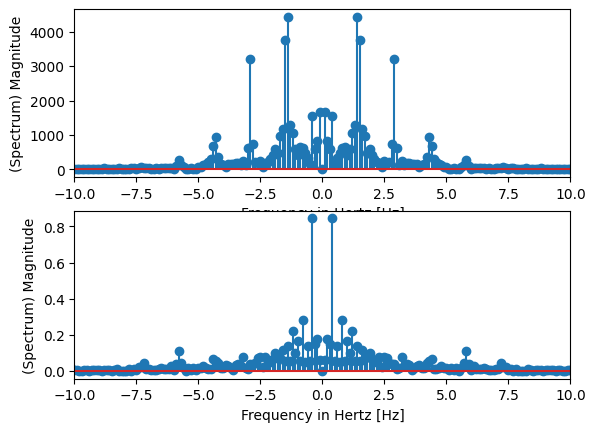

In [34]:
from scipy import fftpack
# number of sample per seconds
f_s = 50
X = fftpack.fft(gold_ts[:n_samp]-np.mean(gold_ts[:n_samp]))
freqs = fftpack.fftfreq(len(gold_ts[:n_samp])) * f_s
plt.figure()
plt.subplot(211)

plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('(Spectrum) Magnitude')
plt.xlim(-f_s / 5, f_s / 5)


Y = fftpack.fft(ballst[:n_samp]-np.mean(ballst[:n_samp]))
freqs = fftpack.fftfreq(len(ballst[:n_samp])) * f_s
plt.subplot(212)

plt.stem(freqs, np.abs(Y))
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('(Spectrum) Magnitude')
plt.xlim(-f_s / 5, f_s / 5)

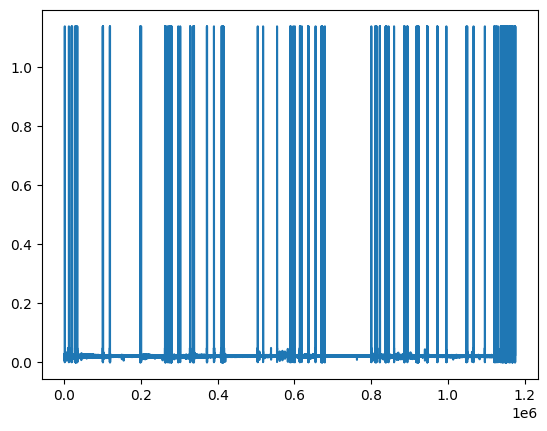

In [30]:
from algorithms import common
common.filter_bandpass(ballst,50,2,10)
plt.plot(ballst)
plt.show()
